In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from itertools import product
import warnings
from dateutil.relativedelta import relativedelta

In [2]:
warnings.filterwarnings('ignore')
# 加载数据
data = pd.read_csv('price_cites.csv')
data['city'] = data['city_district'].apply(lambda x: x.split('_')[0])
data['district'] = data['city_district'].apply(lambda x: x.split('_')[1])
data.drop(['city_district'], axis=1, inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7952 non-null   object 
 1   price     7940 non-null   float64
 2   increase  7495 non-null   float64
 3   city      7952 non-null   object 
 4   district  7952 non-null   object 
dtypes: float64(2), object(3)
memory usage: 310.8+ KB


In [4]:
data.head()

,date,price,increase,city,district
0,2011-09,11583.0,0.0057,shenzhen,longgang
1,2011-08,11517.0,0.0034,shenzhen,longgang
2,2011-07,11478.0,0.0056,shenzhen,longgang
3,2011-05,11502.0,0.0041,shenzhen,longgang
4,2011-03,11477.0,0.0308,shenzhen,longgang


In [5]:
#线性插值
data.price.interpolate(inplace=True)

In [17]:
# 按城市分割数据集
cities = data['city'].unique()
short = {'guangzhou':'gz', 'hangzhou':'hz', 'shanghai':'sh', 'shenzhen':'sz', 'beijing':'bj'}
for city in cities:
    exec("df_%s = data[data['city']== city]" % short[city])
    exec("df_%s = df_%s[df_%s['district']=='whole']" % (short[city], short[city], short[city]))
    exec("df_%s = df_%s[['date', 'price']]" % (short[city], short[city]))
    exec("df_%s.rename(columns={'price':'price_%s'}, inplace=True)" % (short[city], short[city]))

In [18]:
# seasonal_decompose
def tsa_sd(df, freq=12):
    result = sm.tsa.seasonal_decompose(df[df.columns[0]], freq=freq)
    result.plot()
    plt.show()

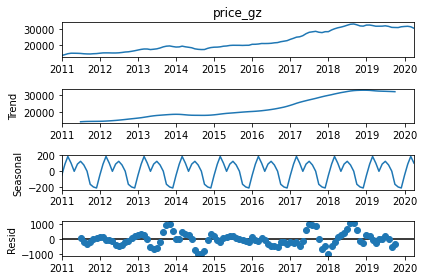

Best Model:                                 SARIMAX Results                                
Dep. Variable:               price_gz   No. Observations:                  112
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -758.701
Date:                Thu, 23 Apr 2020   AIC                           1527.401
Time:                        03:22:32   BIC                           1540.718
Sample:                    01-01-2011   HQIC                          1532.799
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7223      0.091      7.960      0.000       0.544       0.900
ma.L2          0.4967      0.113      4.380      0.000       0.274       0.719
ma.L3          0.3223      0.108      2

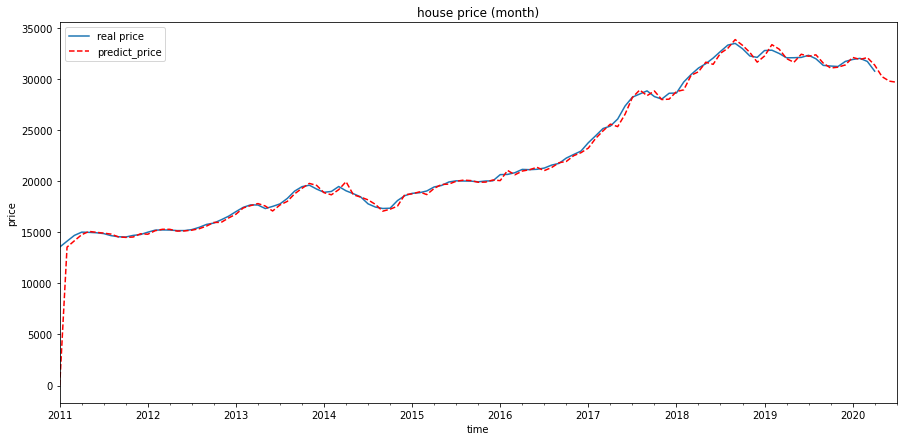

----------------------------------------------------------------------------------------------------------------------------------


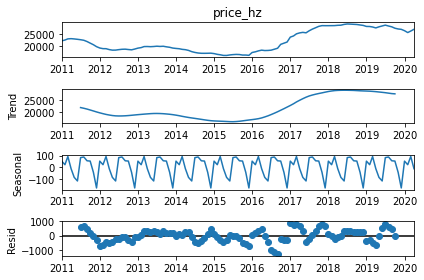

Best Model:                                 SARIMAX Results                                
Dep. Variable:               price_hz   No. Observations:                  112
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -771.070
Date:                Thu, 23 Apr 2020   AIC                           1558.139
Time:                        03:22:34   BIC                           1579.447
Sample:                    01-01-2011   HQIC                          1566.775
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5103      0.224      2.277      0.023       0.071       0.949
ar.L2         -0.3674      0.258     -1.422      0.155      -0.874       0.139
ar.L3          0.5824      0.206      2

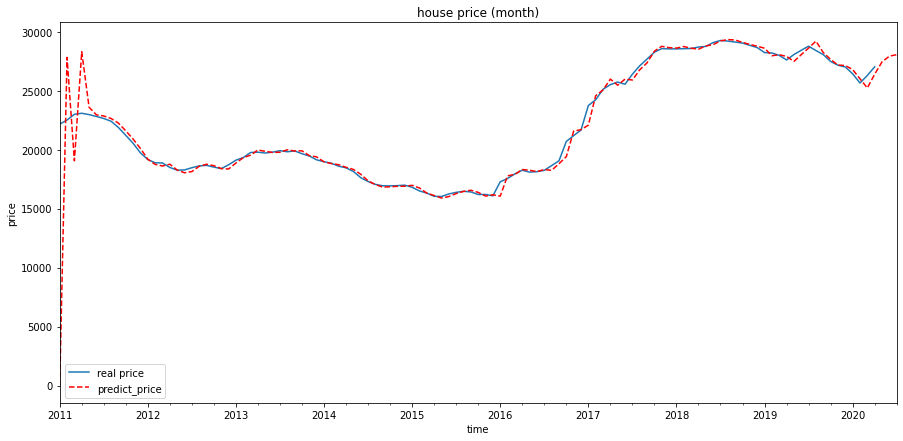

----------------------------------------------------------------------------------------------------------------------------------


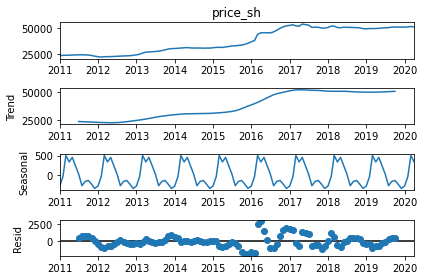

Best Model:                                 SARIMAX Results                                
Dep. Variable:               price_sh   No. Observations:                  112
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -852.321
Date:                Thu, 23 Apr 2020   AIC                           1718.641
Time:                        03:22:37   BIC                           1737.285
Sample:                    01-01-2011   HQIC                          1726.198
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5908      0.301      5.294      0.000       1.002       2.180
ar.L2         -0.6530      0.270     -2.415      0.016      -1.183      -0.123
ma.L1         -1.2611      0.306     -4

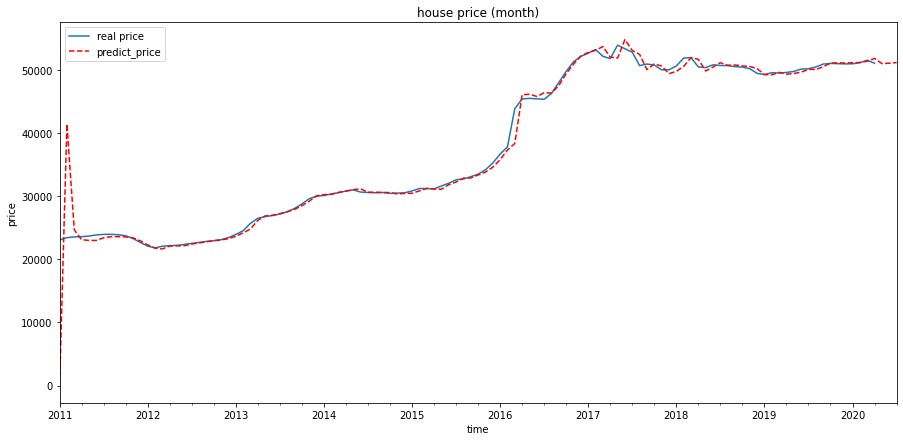

----------------------------------------------------------------------------------------------------------------------------------


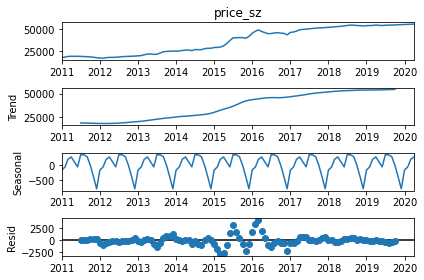

Best Model:                                 SARIMAX Results                                
Dep. Variable:               price_sz   No. Observations:                  112
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -846.820
Date:                Thu, 23 Apr 2020   AIC                           1709.640
Time:                        03:22:40   BIC                           1730.948
Sample:                    01-01-2011   HQIC                          1718.276
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9918      0.098     20.272      0.000       1.799       2.184
ar.L2         -1.8196      0.148    -12.323      0.000      -2.109      -1.530
ar.L3          0.7520      0.102      7

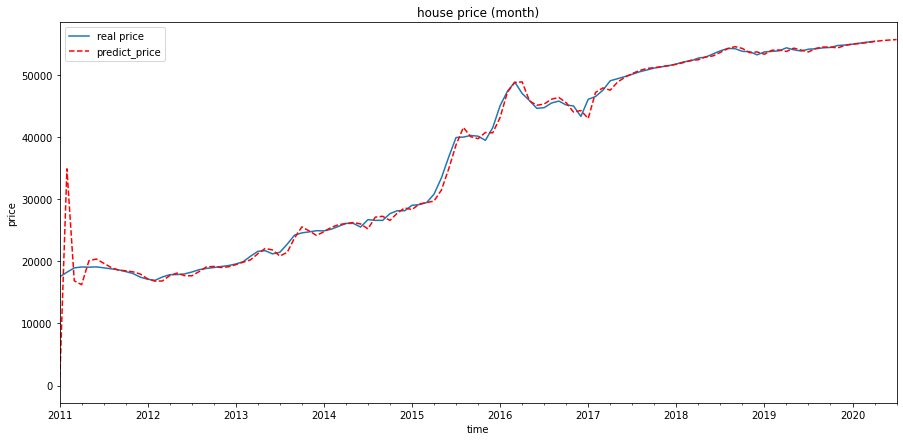

----------------------------------------------------------------------------------------------------------------------------------


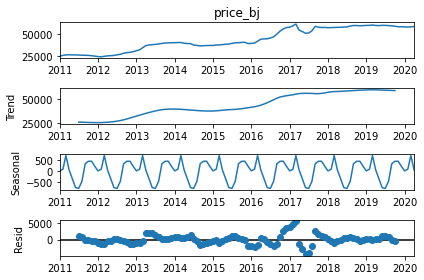

Best Model:                                 SARIMAX Results                                
Dep. Variable:               price_bj   No. Observations:                  112
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -891.632
Date:                Thu, 23 Apr 2020   AIC                           1797.264
Time:                        03:22:42   BIC                           1815.908
Sample:                    01-01-2011   HQIC                          1804.820
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9246      0.204     -4.522      0.000      -1.325      -0.524
ar.L2         -0.5552      0.242     -2.291      0.022      -1.030      -0.080
ma.L1          1.4197      0.210      6

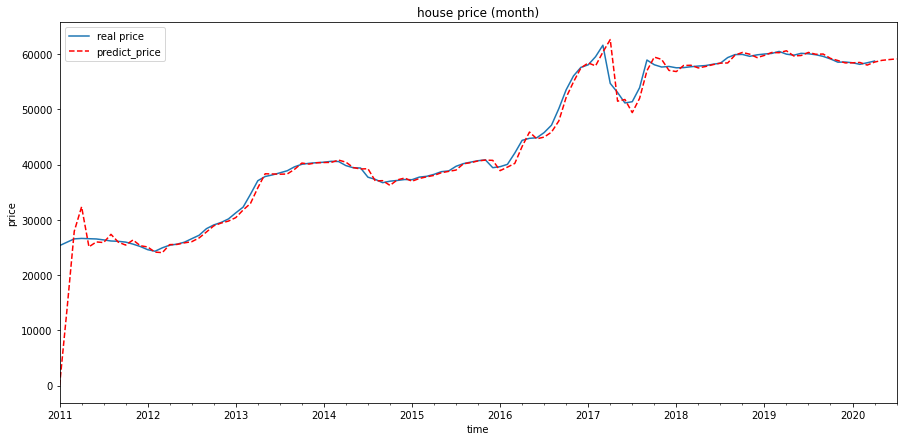

----------------------------------------------------------------------------------------------------------------------------------


In [19]:
# ARIMA
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
for df in [df_gz, df_hz, df_sh, df_sz, df_bj]:
    df.date = pd.to_datetime(df.date, format='%Y-%m')
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    tsa_sd(df)
    parameters = product(ps, ds, qs)
    parameters_list = list(parameters)
    result = []
    best_aic = float('inf')
    for param in parameters_list:
        try:
            model = sm.tsa.statespace.SARIMAX(df[df.columns[0]], order=(param[0], param[1], param[2]), enforce_stationarity=False, enforce_invertibility=False).fit()
        except:
            print('param error:', param)
            continue
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_param = param
        result.append([param, model.aic])
    print('Best Model: ', best_model.summary())
    
    df_future = df.copy()
    future_month = 3
    last_month = df_future.index[-1]
    date_list = []
    for i in range(1, future_month+1):
        next_month = last_month + relativedelta(months=i)
        date_list.append(next_month)
    future = pd.DataFrame(index=date_list, columns=df.columns)
    df_future = pd.concat([df_future, future])
    df_future['forecast'] = best_model.get_prediction(start=0, end=len(df_future)).predicted_mean
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.figure(figsize=(15,7))
    df_future[df_future.columns[0]].plot(label='real price')
    df_future.forecast.plot(color='r', ls='--', label='predict_price')
    plt.legend()
    plt.title('house price (month)')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.show()
    print('-'*130)